<a href="https://colab.research.google.com/github/aldrichch/thesis-data-analysis-using-Python/blob/main/Thesis_Coopted_Boards_and_Corporate_Risk_Taking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Aldrich's thesis notebook

Let's summarize the data analysis output here


*   It only has 23 different year
*   fracdirafterindep is not significant
*   Around 18.000 data from 24.000 that available for the regression







# Libraries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
df = pd.read_excel('/content/Data.xls')
df

,CUSIP,year,iv3ff,iv5ff,GVKEY,FYEAR,SIC,STATE,tobinq,HHI,...,IO,naf,fracdirafter,twfracdirafter,state_name,convictions,population,adj_corruption,dummy_corruption,Corruption
0,00036020,2009,0.016793,0.015661,21542,2009,3585,OK,2.345586,0.191532,...,0.631598,3.166667,1.000000,1.000000,Oklahoma,22.0,3687050.0,0.005967,1,1.000000
1,00036020,2010,0.013026,0.012010,21542,2010,3585,OK,3.131331,0.182069,...,0.615583,1.000000,1.000000,1.000000,Oklahoma,14.0,3760014.0,0.003723,1,1.000000
2,00036020,2011,0.016259,0.014960,21542,2011,3585,OK,3.034455,0.184981,...,0.627414,1.083333,1.000000,1.000000,Oklahoma,24.0,3788824.0,0.006334,1,1.000000
3,00036020,2012,0.012918,0.011902,21542,2012,3585,OK,2.849280,0.194418,...,0.591742,1.583333,1.000000,1.000000,Oklahoma,26.0,3819320.0,0.006807,1,1.000000
4,00036020,2016,0.011987,0.011282,21542,2016,3585,OK,6.943502,0.177816,...,0.599036,2.916667,1.000000,1.000000,Oklahoma,13.0,3928143.0,0.003309,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24401,98978V10,2017,0.007308,0.006911,13721,2017,2834,NJ,4.828419,0.088587,...,0.920230,20.416667,0.800000,0.751719,New Jersey,21.0,8888147.0,0.002363,0,0.000000
24402,98978V10,2018,0.008580,0.007864,13721,2018,2834,NJ,4.559686,0.089466,...,0.918193,19.000000,0.818182,0.767431,New Jersey,31.0,8891730.0,0.003486,1,0.818182
24403,98978V10,2019,0.008423,0.007681,13721,2019,2834,NJ,6.179223,0.088621,...,0.909482,16.666667,0.818182,0.775681,New Jersey,35.0,8891258.0,0.003936,1,0.818182
24404,98978V10,2020,0.011495,0.010786,13721,2020,2834,NJ,6.475651,0.087261,...,0.908747,18.166667,0.000000,0.000000,New Jersey,15.0,8882371.0,0.001689,0,0.000000


# Exploratory Data Analysis

## Unique Values

In [ ]:
unique_firm_ids = df['CUSIP'].nunique()
print("Number of unique CUSIP:", unique_firm_ids)

Number of unique CUSIP: 2300


In [ ]:
unique_states = df['STATE'].nunique()
print("Number of STATE:", unique_states)

Number of STATE: 51


In [ ]:
unique_industry = df['SIC'].nunique()
print("Number of SIC:", unique_industry)

Number of SIC: 362


## Dropped Columns

In [ ]:
# Drop the unnecessary columns for the analysis
dropped_columns = ['adj_corruption', 'dummy_corruption', 'Corruption', 'population', 'convictions', 'state_name']
df = df.drop(columns= dropped_columns)

In [ ]:
df.columns

Index(['CUSIP', 'year', 'iv3ff', 'iv5ff', 'GVKEY', 'FYEAR', 'SIC', 'STATE',
       'tobinq', 'HHI', 'ln_at', 'rd', 'coa', 'roa', 'lev', 'ln_kl', 'ad',
       'findisfirm', 'IO', 'naf', 'fracdirafter', 'twfracdirafter'],
      dtype='object')

## Dropped Data (rows)

In [ ]:
# df.isna().any()

CUSIP             False
year              False
iv3ff             False
iv5ff             False
GVKEY             False
FYEAR             False
SIC               False
tobinq             True
HHI               False
ln_at             False
rd                False
coa               False
roa               False
lev               False
ln_kl              True
ad                 True
findisfirm        False
IO                 True
naf                True
fracdirafter      False
twfracdirafter    False
dtype: bool

In [ ]:
# missing_values = df.isnull().sum()
# print(missing_values)

CUSIP                0
year                 0
iv3ff                0
iv5ff                0
GVKEY                0
FYEAR                0
SIC                  0
tobinq              47
HHI                  0
ln_at                0
rd                   0
coa                  0
roa                  0
lev                  0
ln_kl              525
ad                   4
findisfirm           0
IO                5044
naf               2649
fracdirafter         0
twfracdirafter       0
dtype: int64


In [ ]:
df = df.dropna()

## Generate Industry for fixed effect

In [ ]:
# Based on SIC column
df['Industry_fe'] = df.groupby('SIC').ngroup()

In [ ]:
# Sort by year
df.sort_values(by=['SIC', 'year'], inplace=True)

In [ ]:
df

,CUSIP,year,iv3ff,iv5ff,GVKEY,FYEAR,SIC,STATE,tobinq,HHI,...,ln_kl,ad,findisfirm,IO,naf,fracdirafter,twfracdirafter,Industry_fe,dummy_frac,cooption
17530,72368610,1996,0.012160,0.011408,8596,1996,100,IA,4.328572,0.316655,...,5.337027,0.0,0,NaN,14.083333,0.000000,0.000000,0,0,0.000000
6589,24487820,1997,0.018265,0.017573,14881,1997,100,IL,3.518837,0.306023,...,5.060274,0.0,0,NaN,8.500000,0.583333,0.352111,0,1,0.583333
17531,72368610,1997,0.013612,0.012637,8596,1997,100,IA,5.772562,0.306023,...,5.338739,0.0,0,NaN,13.500000,0.000000,0.000000,0,0,0.000000
6590,24735710,1998,0.031433,0.028877,28524,1998,100,MS,6.329126,0.292725,...,4.669631,0.0,0,NaN,5.833333,1.000000,1.000000,0,1,1.000000
17532,72368610,1998,0.021020,0.019962,8596,1998,100,IA,3.971849,0.292725,...,5.384997,0.0,0,NaN,11.250000,0.133333,0.016764,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,43851610,2019,0.006149,0.005672,1300,2019,9997,NC,2.801338,0.402833,...,4.846623,0.0,0,0.774136,23.666667,0.083333,0.013938,361,0,0.000000
2983,08467070,2020,0.006618,0.006352,2176,2020,9997,NE,1.023545,0.442401,...,6.617770,0.0,0,0.664034,3.166667,0.928571,0.796822,361,1,0.928571
10706,43851610,2020,0.010579,0.009590,1300,2020,9997,NC,2.990329,0.442401,...,4.988383,0.0,0,0.754192,24.333333,0.230769,0.044305,361,0,0.000000
2984,08467070,2021,0.004512,0.004069,2176,2021,9997,NE,1.069619,0.482279,...,6.623970,0.0,0,0.616151,3.000000,0.928571,0.803231,361,1,0.928571


## Descriptive Statistics

In [ ]:
dropped_columns = ['year', 'GVKEY', 'FYEAR', 'SIC', 'Industry_fe']
df_descriptive_stat = df.drop(columns= dropped_columns)

In [ ]:
transposed_df = df_descriptive_stat.describe().transpose()
transposed_df

,count,mean,std,min,25%,50%,75%,max
iv3ff,24406.0,0.017335,0.009168,0.003443,0.011064,0.015166,0.020872,0.103327
iv5ff,24406.0,0.015987,0.008471,0.003312,0.010191,0.013966,0.019294,0.097885
tobinq,24359.0,1.952249,1.480376,0.414070,1.147785,1.521739,2.204021,44.549927
HHI,24406.0,0.206876,0.180231,0.009793,0.087435,0.155074,0.263562,1.245072
ln_at,24406.0,8.019396,1.646474,2.819413,6.812288,7.823198,9.035107,14.644679
rd,24406.0,0.023649,0.049110,0.000000,0.000000,0.000000,0.025669,1.124906
coa,24406.0,0.123813,0.142327,-0.001607,0.023883,0.070899,0.171708,0.946100
roa,24406.0,0.132666,0.096015,-2.597503,0.085329,0.126736,0.176274,0.965093
lev,24406.0,0.261653,0.196399,0.000000,0.119903,0.249186,0.367809,3.892046
ln_kl,23881.0,4.976622,1.415315,-0.720931,4.083415,4.718499,5.611666,12.010943


## Generate Industry Fixed Effect

In [ ]:
unique_industry = df['Industry_fe'].unique()

# Create a dictionary to store dummy variables for firm_id starting from index 1
industry_dummies = {}
for i, Industry_fe in enumerate(unique_industry, start=1):
    dummy_name = f"Industry_{i}"
    industry_dummies[dummy_name] = (df['Industry_fe'] == Industry_fe).astype(int)

# Create a DataFrame of dummy variables
industry_dummies_df = pd.DataFrame(industry_dummies)

## Generate Year Fixed Effect

In [ ]:
shifted_years = df['year'] - 1995  # Shifting the years to start from 1 to 21 (1996 to 2022)

year_dummies = {}
for year in range(1996, 2023):
    dummy_name = f"year_{year}"
    year_dummies[dummy_name] = (shifted_years == (year - 1995)).astype(int)

# Create a DataFrame of dummy variables for year
year_dummies_df = pd.DataFrame(year_dummies)

## Generate STATE Fixed Effect

In [ ]:
df['STATE'] = pd.factorize(df['STATE'])[0]

In [ ]:
unique_states = df['STATE'].unique()

# Create a dictionary to store dummy variables for STATE starting from index 1
state_dummies = {}
for i, state in enumerate(unique_states, start=1):
    dummy_name = f"state_{i}"
    state_dummies[dummy_name] = (df['STATE'] == state).astype(int)

# Create a DataFrame of dummy variables
state_dummies_df = pd.DataFrame(state_dummies)

## Combine

In [ ]:
df = pd.concat([df, year_dummies_df, industry_dummies_df, state_dummies_df], axis=1)

In [ ]:
df

,CUSIP,year,iv3ff,iv5ff,GVKEY,FYEAR,SIC,STATE,tobinq,HHI,...,state_43,state_44,state_45,state_46,state_47,state_48,state_49,state_50,state_51,state_52
17530,72368610,1996,0.012160,0.011408,8596,1996,100,0,4.328572,0.316655,...,0,0,0,0,0,0,0,0,0,0
6589,24487820,1997,0.018265,0.017573,14881,1997,100,1,3.518837,0.306023,...,0,0,0,0,0,0,0,0,0,0
17531,72368610,1997,0.013612,0.012637,8596,1997,100,0,5.772562,0.306023,...,0,0,0,0,0,0,0,0,0,0
6590,24735710,1998,0.031433,0.028877,28524,1998,100,2,6.329126,0.292725,...,0,0,0,0,0,0,0,0,0,0
17532,72368610,1998,0.021020,0.019962,8596,1998,100,0,3.971849,0.292725,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,43851610,2019,0.006149,0.005672,1300,2019,9997,18,2.801338,0.402833,...,0,0,0,0,0,0,0,0,0,0
2983,08467070,2020,0.006618,0.006352,2176,2020,9997,37,1.023545,0.442401,...,0,0,0,0,0,0,0,0,0,0
10706,43851610,2020,0.010579,0.009590,1300,2020,9997,18,2.990329,0.442401,...,0,0,0,0,0,0,0,0,0,0
2984,08467070,2021,0.004512,0.004069,2176,2021,9997,37,1.069619,0.482279,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(columns=['CUSIP', 'GVKEY', 'FYEAR'])

In [ ]:
df.columns

Index(['year', 'iv3ff', 'iv5ff', 'SIC', 'STATE', 'tobinq', 'HHI', 'ln_at',
       'rd', 'coa',
       ...
       'state_43', 'state_44', 'state_45', 'state_46', 'state_47', 'state_48',
       'state_49', 'state_50', 'state_51', 'state_52'],
      dtype='object', length=461)

# Winsorize

In [ ]:
data = df

In [ ]:
def process_input(input_tuple):
    cleaned_input = str(input_tuple).replace("'", "")
    return cleaned_input

input_tuple = ('iv3ff', 'iv5ff', 'tobinq', 'HHI', 'rd', 'coa', 'roa', 'lev', 'ad', 'naf', 'IO', 'fracdirafter', 'twfracdirafter')
cleaned_input = process_input(input_tuple)
print(cleaned_input)

(iv3ff, iv5ff, tobinq, HHI, rd, coa, roa, lev, ad, naf, IO, fracdirafter, twfracdirafter)


In [ ]:
def winsorize_columns(data, lower_percentile=1, upper_percentile=99):
    winsorized_columns = input("Enter the columns to winsorize (comma-separated): ").split(',')
    winsorized_columns = [column.strip() for column in winsorized_columns]

    for column in winsorized_columns:
        lower_bound = data[column].quantile(lower_percentile / 100)
        upper_bound = data[column].quantile(upper_percentile / 100)
        winsorized_column = column + '_Winsorized'
        data[winsorized_column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    data = data.drop(columns=winsorized_columns)
    return data

data = winsorize_columns(data)

Enter the columns to winsorize (comma-separated): iv3ff, iv5ff, tobinq, HHI, rd, coa, roa, lev, ad, naf, IO, fracdirafter, twfracdirafter


In [ ]:
# iv3ff, iv5ff, tobinq, HHI, rd, coa, roa, lev, ad, naf, IO, fracdirafter, twfracdirafter

In [ ]:
def plot_distributions(data, columns_to_plot):
    sns.set(style="whitegrid")

    n_cols = 4
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.ravel()

    for i, column in enumerate(columns_to_plot):
        if i >= n_rows * n_cols:
            fig.delaxes(axes[i])
            continue
        sns.histplot(data[column], bins=30, kde=True, color='blue', ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

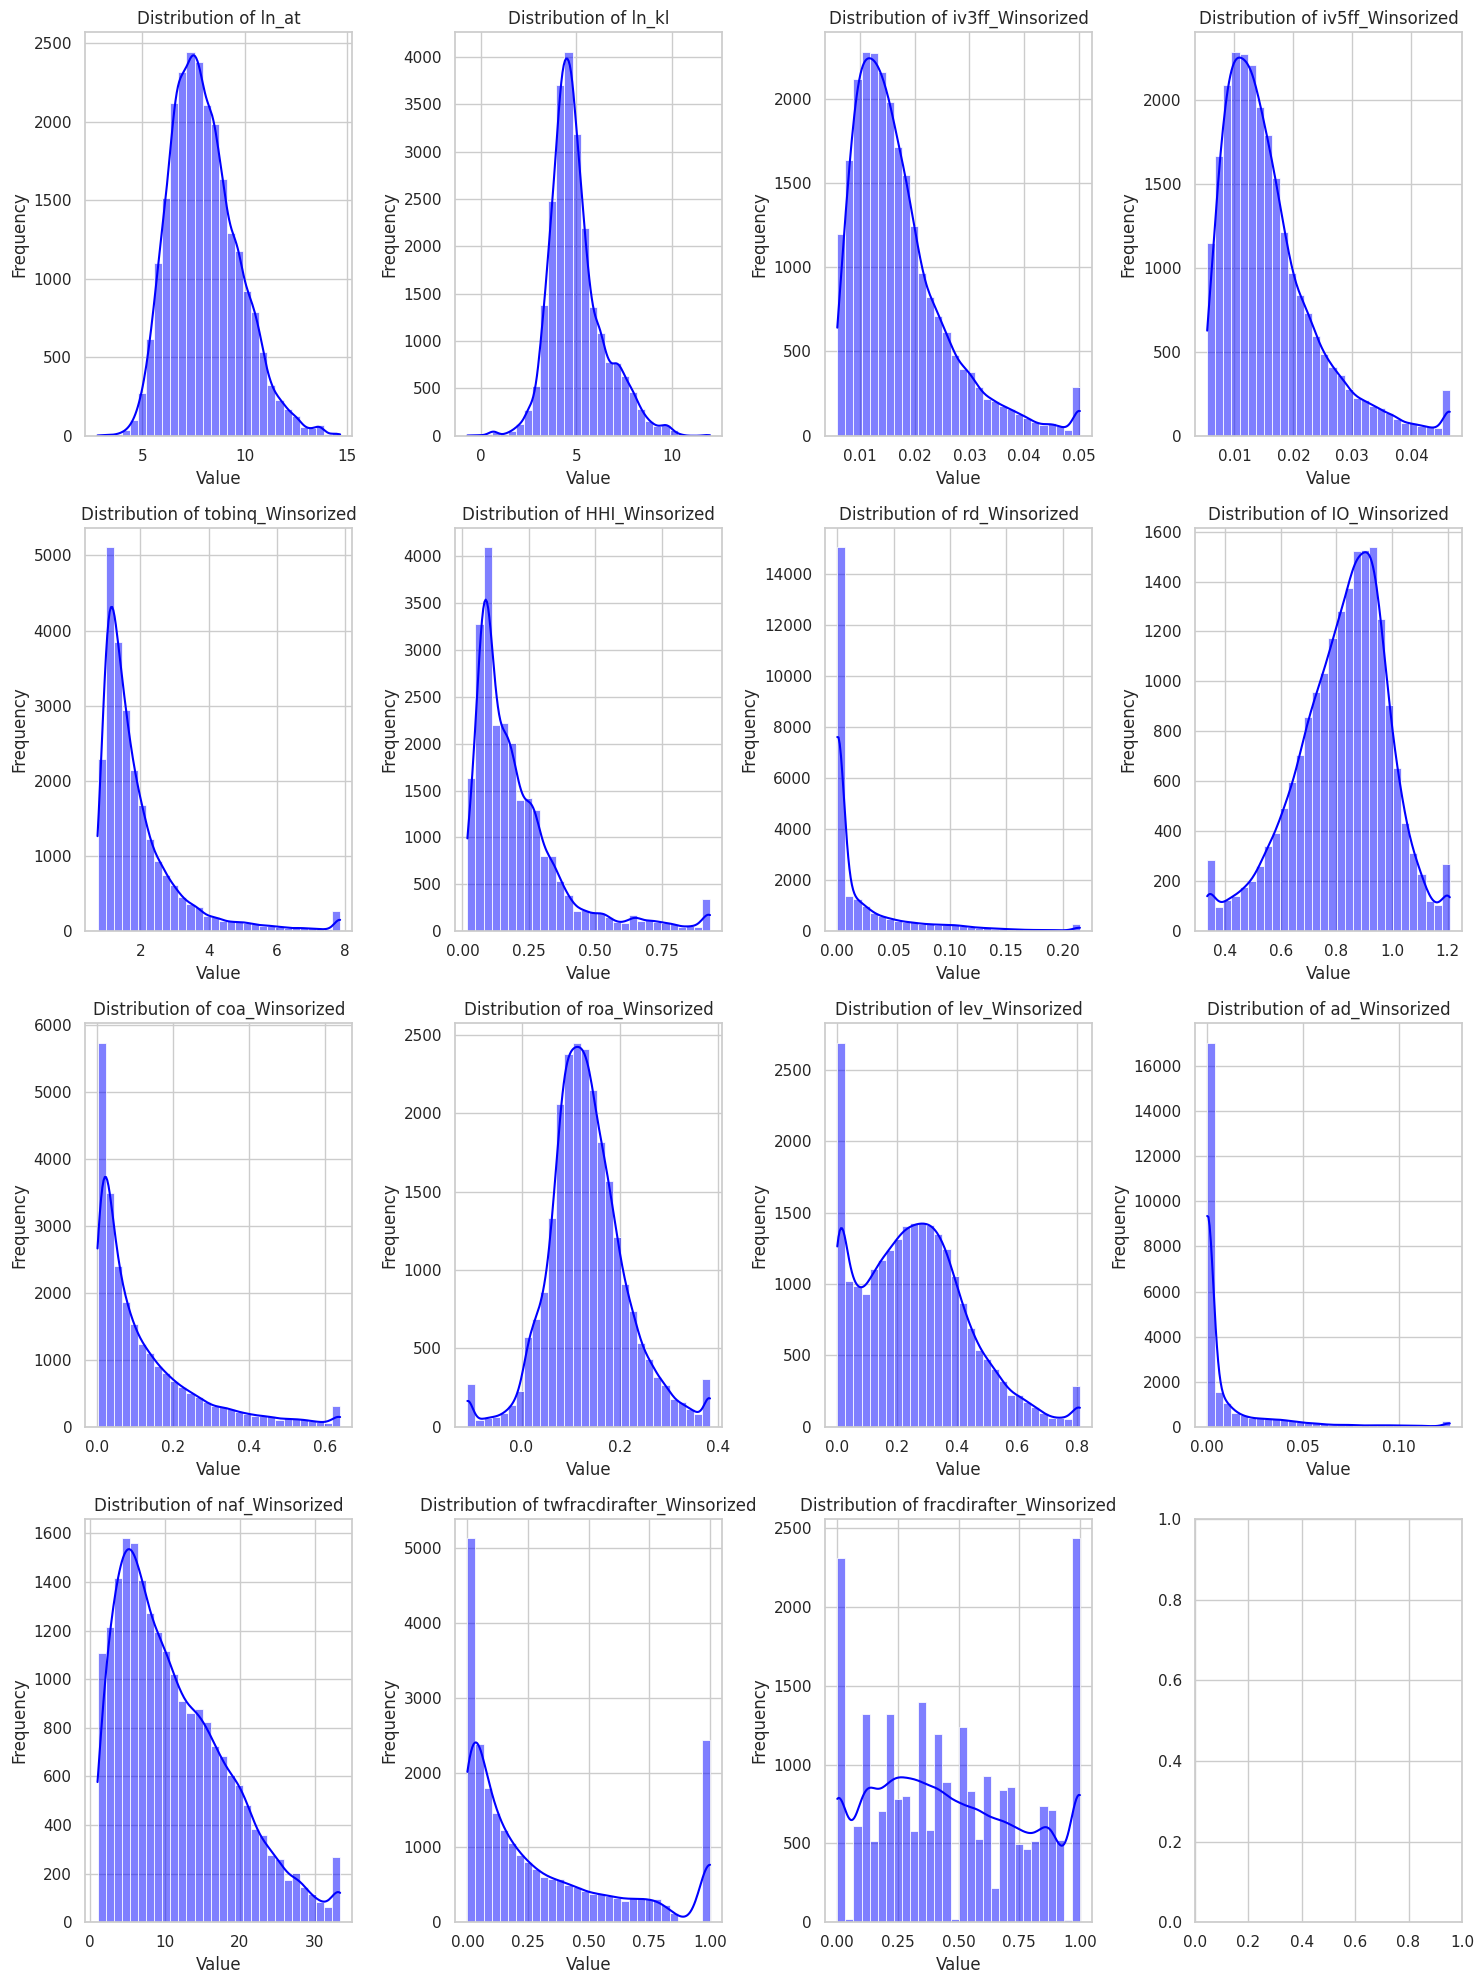

In [ ]:
plot_distributions(data, ['ln_at', 'ln_kl', 'iv3ff_Winsorized', 'iv5ff_Winsorized','tobinq_Winsorized',
       'HHI_Winsorized', 'rd_Winsorized', 'IO_Winsorized','coa_Winsorized', 'roa_Winsorized',
       'lev_Winsorized', 'ad_Winsorized', 'naf_Winsorized',
       'twfracdirafter_Winsorized','fracdirafter_Winsorized'])

In [ ]:
column_names = data.columns.tolist()
print(column_names)

['year', 'SIC', 'STATE', 'ln_at', 'ln_kl', 'findisfirm', 'Industry_fe', 'year_1996', 'year_1997', 'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022', 'Industry_1', 'Industry_2', 'Industry_3', 'Industry_4', 'Industry_5', 'Industry_6', 'Industry_7', 'Industry_8', 'Industry_9', 'Industry_10', 'Industry_11', 'Industry_12', 'Industry_13', 'Industry_14', 'Industry_15', 'Industry_16', 'Industry_17', 'Industry_18', 'Industry_19', 'Industry_20', 'Industry_21', 'Industry_22', 'Industry_23', 'Industry_24', 'Industry_25', 'Industry_26', 'Industry_27', 'Industry_28', 'Industry_29', 'Industry_30', 'Industry_31', 'Industry_32', 'Industry_33', 'Industry_34', 'Industry_35', 'Industry_36', 'Industry_37', 'Industry_38', 'Industry_39', '

In [ ]:
missing_values_data = data.isnull().sum()
print(missing_values_data)

year                         0
SIC                          0
STATE                        0
ln_at                        0
ln_kl                        0
                            ..
ad_Winsorized                0
naf_Winsorized               0
IO_Winsorized                0
fracdirafter_Winsorized      0
twfracdirafter_Winsorized    0
Length: 461, dtype: int64


# Drop the missing values before the regression analysis

In [ ]:
data = data.dropna()

In [ ]:
data

,year,SIC,STATE,ln_at,ln_kl,findisfirm,Industry_fe,year_1996,year_1997,year_1998,...,HHI_Winsorized,rd_Winsorized,coa_Winsorized,roa_Winsorized,lev_Winsorized,ad_Winsorized,naf_Winsorized,IO_Winsorized,fracdirafter_Winsorized,twfracdirafter_Winsorized
15027,2003,100,3,9.154933,5.855983,0,0,0,0,0,...,0.294103,0.053906,0.054011,0.121340,0.161399,0.000000,8.583333,0.815545,0.142857,0.023774
15028,2012,100,3,9.914625,5.828380,0,0,0,0,0,...,0.365019,0.075010,0.177265,0.185967,0.102551,0.006422,22.083333,0.861549,0.000000,0.000000
15029,2013,100,3,9.936148,5.892340,0,0,0,0,0,...,0.382626,0.074187,0.189799,0.202623,0.102207,0.006372,23.000000,0.854140,0.000000,0.000000
15030,2014,100,3,9.997934,5.949581,0,0,0,0,0,...,0.468470,0.078477,0.109504,0.218370,0.353078,0.005660,23.333333,0.859422,0.083333,0.014716
15031,2015,100,3,9.995155,6.013571,0,0,0,0,0,...,0.629485,0.072080,0.170985,0.223495,0.412591,0.004921,20.416667,0.835228,0.153846,0.034458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,2019,9997,18,10.979837,4.846623,0,361,0,0,0,...,0.402833,0.026517,0.177508,0.144600,0.284719,0.000000,23.666667,0.774136,0.083333,0.013938
2983,2020,9997,37,13.680526,6.617770,0,361,0,0,0,...,0.442401,0.000000,0.170698,0.092262,0.140048,0.000000,3.166667,0.664034,0.928571,0.796822
10706,2020,9997,18,11.075753,4.988383,0,361,0,0,0,...,0.442401,0.020655,0.235655,0.112610,0.359397,0.000000,24.333333,0.754192,0.230769,0.044305
2984,2021,9997,37,13.773421,6.623970,0,361,0,0,0,...,0.482279,0.000000,0.163130,0.130979,0.124379,0.000000,3.000000,0.616151,0.928571,0.803231


In [ ]:
unique_industry_after = data['SIC'].nunique()
print("Number of SIC:", unique_industry_after)

Number of SIC: 351


In [ ]:
unique_year_after = data['year'].nunique()
print("Number of Year:", unique_year_after)

Number of Year: 23


# Regression with Year and Industry Fixed Effects

In [ ]:
# Control variables
# fracdirafter_Winsorized
# twfracdirafter_Winsorized
independent = data[['fracdirafter_Winsorized', 'tobinq_Winsorized','HHI_Winsorized','ln_at', 'rd_Winsorized', 'coa_Winsorized',
                    'roa_Winsorized', 'lev_Winsorized', 'ln_kl', 'ad_Winsorized', 'findisfirm', 'IO_Winsorized', 'naf_Winsorized',
                    'year_1996','year_1997', 'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002', 'year_2003',
                    'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011',
                    'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017','year_2018','year_2019',
                    'year_2020','year_2021', 'year_2022',
                    'Industry_1', 'Industry_2', 'Industry_3', 'Industry_4', 'Industry_5', 'Industry_6', 'Industry_7',
                    'Industry_8', 'Industry_9', 'Industry_10', 'Industry_11', 'Industry_12', 'Industry_13', 'Industry_14',
                    'Industry_15', 'Industry_16', 'Industry_17', 'Industry_18', 'Industry_19', 'Industry_20', 'Industry_21',
                    'Industry_22', 'Industry_23', 'Industry_24', 'Industry_25', 'Industry_26', 'Industry_27', 'Industry_28',
                    'Industry_29', 'Industry_30', 'Industry_31', 'Industry_32', 'Industry_33', 'Industry_34', 'Industry_35',
                    'Industry_36', 'Industry_37', 'Industry_38', 'Industry_39', 'Industry_40', 'Industry_41', 'Industry_42',
                    'Industry_43', 'Industry_44', 'Industry_45', 'Industry_46', 'Industry_47', 'Industry_48', 'Industry_49',
                    'Industry_50', 'Industry_51', 'Industry_52', 'Industry_53', 'Industry_54', 'Industry_55', 'Industry_56',
                    'Industry_57', 'Industry_58', 'Industry_59', 'Industry_60', 'Industry_61', 'Industry_62', 'Industry_63',
                    'Industry_64', 'Industry_65', 'Industry_66', 'Industry_67', 'Industry_68', 'Industry_69', 'Industry_70',
                    'Industry_71', 'Industry_72', 'Industry_73', 'Industry_74', 'Industry_75', 'Industry_76', 'Industry_77',
                    'Industry_78', 'Industry_79', 'Industry_80', 'Industry_81', 'Industry_82', 'Industry_83', 'Industry_84',
                    'Industry_85', 'Industry_86', 'Industry_87', 'Industry_88', 'Industry_89', 'Industry_90', 'Industry_91',
                    'Industry_92', 'Industry_93', 'Industry_94', 'Industry_95', 'Industry_96', 'Industry_97', 'Industry_98',
                    'Industry_99', 'Industry_100', 'Industry_101', 'Industry_102', 'Industry_103', 'Industry_104', 'Industry_105',
                    'Industry_106', 'Industry_107', 'Industry_108', 'Industry_109', 'Industry_110', 'Industry_111', 'Industry_112',
                    'Industry_113', 'Industry_114', 'Industry_115', 'Industry_116', 'Industry_117', 'Industry_118', 'Industry_119',
                    'Industry_120', 'Industry_121', 'Industry_122', 'Industry_123', 'Industry_124', 'Industry_125', 'Industry_126',
                    'Industry_127', 'Industry_128', 'Industry_129', 'Industry_130', 'Industry_131', 'Industry_132', 'Industry_133',
                    'Industry_134', 'Industry_135', 'Industry_136', 'Industry_137', 'Industry_138', 'Industry_139', 'Industry_140',
                    'Industry_141', 'Industry_142', 'Industry_143', 'Industry_144', 'Industry_145', 'Industry_146', 'Industry_147',
                    'Industry_148', 'Industry_149', 'Industry_150', 'Industry_151', 'Industry_152', 'Industry_153', 'Industry_154',
                    'Industry_155', 'Industry_156', 'Industry_157', 'Industry_158', 'Industry_159', 'Industry_160', 'Industry_161',
                    'Industry_162', 'Industry_163', 'Industry_164', 'Industry_165', 'Industry_166', 'Industry_167', 'Industry_168',
                    'Industry_169', 'Industry_170', 'Industry_171', 'Industry_172', 'Industry_173', 'Industry_174', 'Industry_175',
                    'Industry_176', 'Industry_177', 'Industry_178', 'Industry_179', 'Industry_180', 'Industry_181', 'Industry_182',
                    'Industry_183', 'Industry_184', 'Industry_185', 'Industry_186', 'Industry_187', 'Industry_188', 'Industry_189',
                    'Industry_190', 'Industry_191', 'Industry_192', 'Industry_193', 'Industry_194', 'Industry_195', 'Industry_196',
                    'Industry_197', 'Industry_198', 'Industry_199', 'Industry_200', 'Industry_201', 'Industry_202', 'Industry_203',
                    'Industry_204', 'Industry_205', 'Industry_206', 'Industry_207', 'Industry_208', 'Industry_209', 'Industry_210',
                    'Industry_211', 'Industry_212', 'Industry_213', 'Industry_214', 'Industry_215', 'Industry_216', 'Industry_217',
                    'Industry_218', 'Industry_219', 'Industry_220', 'Industry_221', 'Industry_222', 'Industry_223', 'Industry_224',
                    'Industry_225', 'Industry_226', 'Industry_227', 'Industry_228', 'Industry_229', 'Industry_230', 'Industry_231',
                    'Industry_232', 'Industry_233', 'Industry_234', 'Industry_235', 'Industry_236', 'Industry_237', 'Industry_238',
                    'Industry_239', 'Industry_240', 'Industry_241', 'Industry_242', 'Industry_243', 'Industry_244', 'Industry_245',
                    'Industry_246', 'Industry_247', 'Industry_248', 'Industry_249', 'Industry_250', 'Industry_251', 'Industry_252',
                    'Industry_253', 'Industry_254', 'Industry_255', 'Industry_256', 'Industry_257', 'Industry_258', 'Industry_259',
                    'Industry_260', 'Industry_261', 'Industry_262', 'Industry_263', 'Industry_264', 'Industry_265', 'Industry_266',
                    'Industry_267', 'Industry_268', 'Industry_269', 'Industry_270', 'Industry_271', 'Industry_272', 'Industry_273',
                    'Industry_274', 'Industry_275', 'Industry_276', 'Industry_277', 'Industry_278', 'Industry_279', 'Industry_280',
                    'Industry_281', 'Industry_282', 'Industry_283', 'Industry_284', 'Industry_285', 'Industry_286', 'Industry_287',
                    'Industry_288', 'Industry_289', 'Industry_290', 'Industry_291', 'Industry_292', 'Industry_293', 'Industry_294',
                    'Industry_295', 'Industry_296', 'Industry_297', 'Industry_298', 'Industry_299', 'Industry_300', 'Industry_301',
                    'Industry_302', 'Industry_303', 'Industry_304', 'Industry_305', 'Industry_306', 'Industry_307', 'Industry_308',
                    'Industry_309', 'Industry_310', 'Industry_311', 'Industry_312', 'Industry_313', 'Industry_314', 'Industry_315',
                    'Industry_316', 'Industry_317', 'Industry_318', 'Industry_319', 'Industry_320', 'Industry_321', 'Industry_322',
                    'Industry_323', 'Industry_324', 'Industry_325', 'Industry_326', 'Industry_327', 'Industry_328', 'Industry_329',
                    'Industry_330', 'Industry_331', 'Industry_332', 'Industry_333', 'Industry_334', 'Industry_335', 'Industry_336',
                    'Industry_337', 'Industry_338', 'Industry_339', 'Industry_340', 'Industry_341', 'Industry_342', 'Industry_343',
                    'Industry_344', 'Industry_345', 'Industry_346', 'Industry_347', 'Industry_348', 'Industry_349', 'Industry_350', 'Industry_351',
                    'Industry_352', 'Industry_353', 'Industry_354', 'Industry_355', 'Industry_356', 'Industry_357', 'Industry_358', 'Industry_359',
                    'Industry_360', 'Industry_361', 'Industry_362']]

# Dependent variable
yi3ff = data['iv3ff_Winsorized']
yi5ff = data['iv5ff_Winsorized']

## Model 1 (Co-option and Fama3)

In [ ]:
X = sm.add_constant(independent)
y = yi3ff

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       iv3ff_Winsorized   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     78.02
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:43:46   Log-Likelihood:                 72644.
No. Observations:               18773   AIC:                        -1.445e+05
Df Residuals:                   18387   BIC:                        -1.415e+05
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0331    

## Model 2 (TW Co-option and Fama3)

In [ ]:
X = sm.add_constant(independent)
y = yi3ff

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       iv3ff_Winsorized   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     77.99
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:24:39   Log-Likelihood:                 72642.
No. Observations:               18773   AIC:                        -1.445e+05
Df Residuals:                   18387   BIC:                        -1.415e+05
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Model 3 (Co-option and Fama5)

In [ ]:
X = sm.add_constant(independent)
y = yi5ff

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       iv5ff_Winsorized   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     77.70
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:27:11   Log-Likelihood:                 74138.
No. Observations:               18773   AIC:                        -1.475e+05
Df Residuals:                   18387   BIC:                        -1.445e+05
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Model 4 (TW Co-option and Fama5)

In [ ]:
X = sm.add_constant(independent)
y = yi5ff

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       iv5ff_Winsorized   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     77.70
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:26:20   Log-Likelihood:                 74138.
No. Observations:               18773   AIC:                        -1.475e+05
Df Residuals:                   18387   BIC:                        -1.445e+05
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Correlation Matrix

In [ ]:
selected_columns = ['fracdirafter_Winsorized','twfracdirafter_Winsorized','iv3ff_Winsorized', 'iv5ff_Winsorized','ln_at', 'ln_kl', 'tobinq_Winsorized',
                    'HHI_Winsorized', 'rd_Winsorized', 'IO_Winsorized', 'coa_Winsorized', 'roa_Winsorized', 'lev_Winsorized', 'ad_Winsorized', 'naf_Winsorized']
selected_data = data[selected_columns]

correlation_matrix = selected_data.corr()
correlation_matrix

,fracdirafter_Winsorized,twfracdirafter_Winsorized,iv3ff_Winsorized,iv5ff_Winsorized,ln_at,ln_kl,tobinq_Winsorized,HHI_Winsorized,rd_Winsorized,IO_Winsorized,coa_Winsorized,roa_Winsorized,lev_Winsorized,ad_Winsorized,naf_Winsorized
fracdirafter_Winsorized,1.000000,0.933392,0.069310,0.069141,-0.087965,-0.068369,0.057824,-0.029205,0.068660,0.051552,0.093512,-0.020858,-0.045428,0.005891,-0.010667
twfracdirafter_Winsorized,0.933392,1.000000,0.090928,0.091096,-0.118762,-0.084406,0.063770,-0.036302,0.079072,0.057123,0.104345,-0.019252,-0.046604,0.004325,-0.022615
iv3ff_Winsorized,0.069310,0.090928,1.000000,0.997234,-0.404736,-0.092299,-0.085849,-0.038618,0.163043,-0.035621,0.148827,-0.197924,0.018102,0.025369,-0.213219
iv5ff_Winsorized,0.069141,0.091096,0.997234,1.000000,-0.414507,-0.106419,-0.089480,-0.034980,0.158468,-0.034937,0.145491,-0.197620,0.016967,0.026484,-0.226821
ln_at,-0.087965,-0.118762,-0.404736,-0.414507,1.000000,0.340149,-0.106756,0.023103,-0.202001,-0.132047,-0.196355,-0.084018,0.232113,0.007809,0.617174
ln_kl,-0.068369,-0.084406,-0.092299,-0.106419,0.340149,1.000000,-0.144822,-0.100115,-0.061052,-0.166803,-0.164274,-0.087596,0.240990,-0.100406,0.161878
tobinq_Winsorized,0.057824,0.063770,-0.085849,-0.089480,-0.106756,-0.144822,1.000000,-0.005475,0.334883,0.018785,0.341746,0.510179,-0.066806,0.182049,0.241151
HHI_Winsorized,-0.029205,-0.036302,-0.038618,-0.034980,0.023103,-0.100115,-0.005475,1.000000,-0.155672,0.052703,-0.104125,0.082919,0.011239,0.071713,-0.022645
rd_Winsorized,0.068660,0.079072,0.163043,0.158468,-0.202001,-0.061052,0.334883,-0.155672,1.000000,0.024815,0.502137,-0.046788,-0.188624,0.000910,0.053985
IO_Winsorized,0.051552,0.057123,-0.035621,-0.034937,-0.132047,-0.166803,0.018785,0.052703,0.024815,1.000000,0.095884,0.019493,0.007838,0.009983,0.016325


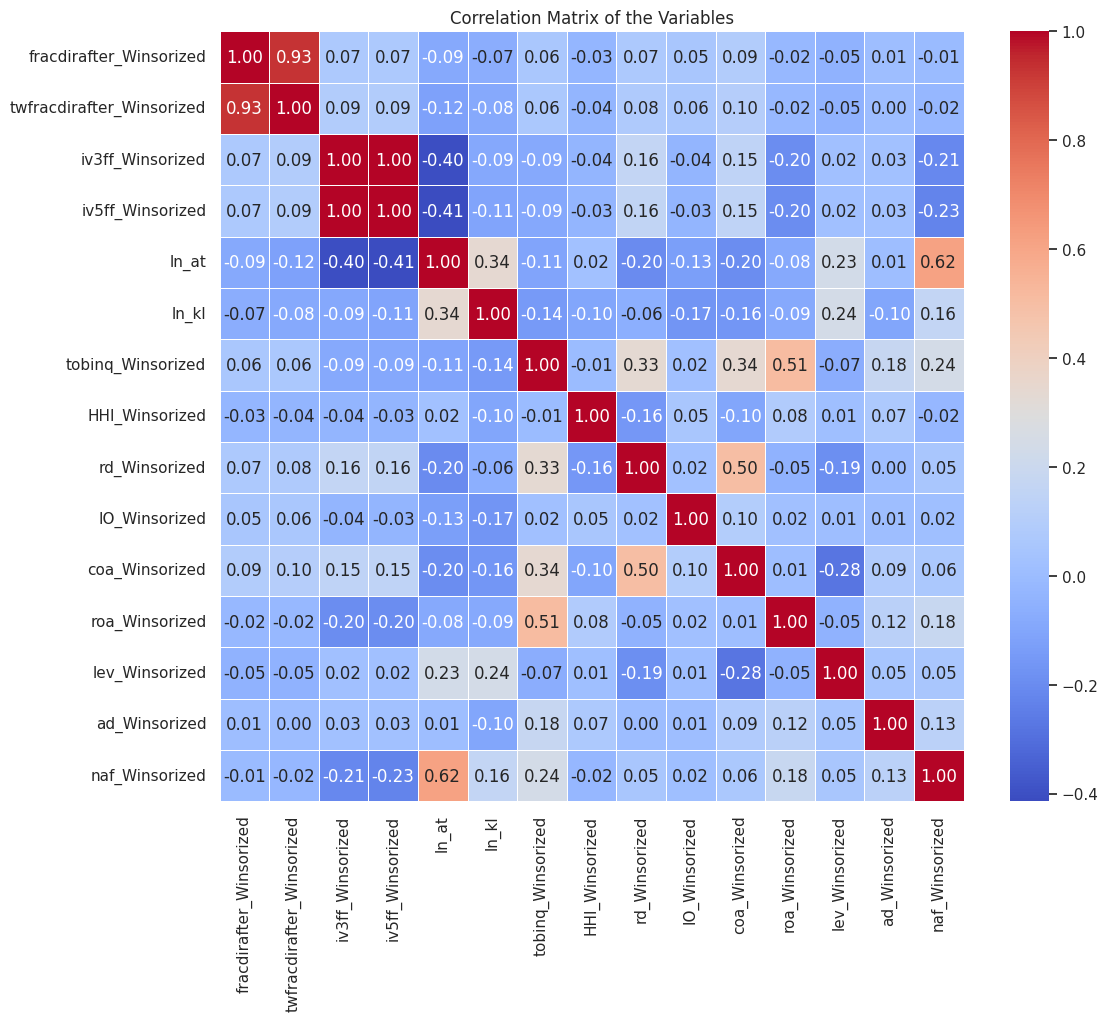

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of the Variables')
plt.show()

# Co-option Trend (Appendix)

In [ ]:
df = pd.read_excel('/content/cooption2023_for_sharing-1 (2).xlsx')
df

,GVKEY,year,fracdirafter,fracdirafterindep,twfracdirafter,twfracdirafterindep
0,1004,1996,1.000,0.7,1.000000,0.641976
1,1004,1997,0.000,0.0,0.000000,0.000000
2,1004,1998,0.000,0.0,0.000000,0.000000
3,1004,1999,0.000,0.0,0.000000,0.000000
4,1004,2000,0.000,0.0,0.000000,0.000000
...,...,...,...,...,...,...
32694,287462,2022,0.625,0.5,0.340486,0.290637
32695,328795,2019,0.000,0.0,0.000000,0.000000
32696,328795,2020,0.000,0.0,0.000000,0.000000
32697,328795,2021,0.000,0.0,0.000000,0.000000


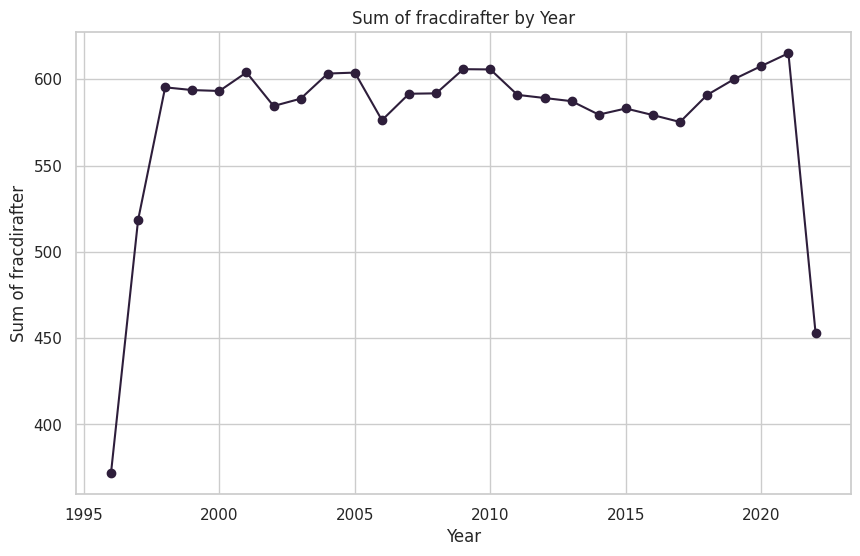

In [ ]:
sum_by_year = df.groupby('year')['fracdirafter'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sum_by_year.index, sum_by_year.values, marker='o', linestyle='-')
plt.title('Sum of fracdirafter by Year')
plt.xlabel('Year')
plt.ylabel('Sum of fracdirafter')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

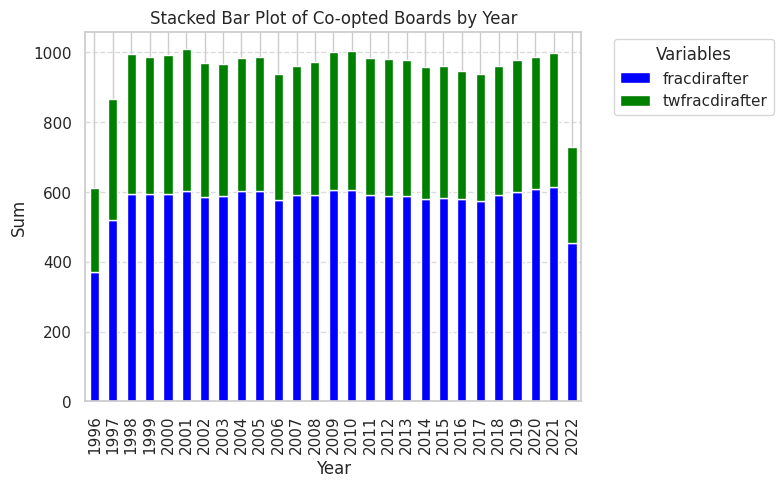

In [ ]:
sum_by_year = df.groupby('year').agg({'fracdirafter': 'sum', 'twfracdirafter': 'sum'})

plt.figure(figsize=(10, 6))
sum_by_year.plot(kind='bar', stacked=True, color=['blue', 'green'])

plt.title('Stacked Bar Plot of Co-opted Boards by Year')
plt.xlabel('Year')
plt.ylabel('Sum')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# drop_columns = ['STATE', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'state_7', 'state_8', 'state_9', 'state_10',
#                    'state_11', 'state_12', 'state_13', 'state_14', 'state_15', 'state_16', 'state_17', 'state_18', 'state_19', 'state_20',
#                    'state_21', 'state_22', 'state_23', 'state_24', 'state_25', 'state_26', 'state_27', 'state_28', 'state_29', 'state_30',
#                    'state_31', 'state_32', 'state_33', 'state_34', 'state_35', 'state_36', 'state_37', 'state_38', 'state_39', 'state_40',
#                    'state_41', 'state_42', 'state_43', 'state_44', 'state_45', 'state_46', 'state_47', 'state_48', 'state_49', 'state_50',
#                    'state_51', 'state_52', 'state_53', 'state_54', 'state_55', 'state_56', 'state_57', 'state_58', 'state_59', 'state_60',
#                    'state_61', 'state_62', 'state_63', 'state_64', 'state_65', 'state_66', 'state_67', 'state_68', 'state_69', 'state_70',
#                    'state_71', 'state_72', 'state_73', 'state_74', 'state_75', 'state_76', 'state_77', 'state_78', 'state_79', 'state_80',
#                    'state_81', 'state_82', 'state_83', 'state_84', 'state_85', 'state_86', 'state_87', 'state_88', 'state_89', 'state_90',
#                    'state_91', 'state_92', 'state_93', 'state_94', 'state_95', 'state_96', 'state_97', 'state_98', 'state_99', 'state_100',
#                    'state_101', 'state_102', 'state_103', 'state_104', 'state_105', 'state_106', 'state_107', 'state_108', 'state_109', 'state_110',
#                    'state_111', 'state_112', 'state_113', 'state_114', 'state_115', 'state_116', 'state_117', 'state_118', 'state_119', 'state_120',
#                    'state_121', 'state_122', 'state_123', 'state_124', 'state_125', 'state_126', 'state_127', 'state_128', 'state_129', 'state_130',
#                    'state_131', 'state_132', 'state_133', 'state_134', 'state_135', 'state_136', 'state_137', 'state_138', 'state_139', 'state_140',
#                    'state_141', 'state_142', 'state_143', 'state_144', 'state_145', 'state_146', 'state_147', 'state_148', 'state_149', 'state_150',
#                    'state_151', 'state_152', 'state_153', 'state_154', 'state_155', 'state_156', 'state_157', 'state_158', 'state_159', 'state_160',
#                    'state_161', 'state_162', 'state_163', 'state_164', 'state_165', 'state_166', 'state_167', 'state_168', 'state_169', 'state_170',
#                    'state_171', 'state_172', 'state_173', 'state_174', 'state_175', 'state_176', 'state_177', 'state_178', 'state_179', 'state_180',
#                    'state_181', 'state_182', 'state_183', 'state_184', 'state_185', 'state_186', 'state_187', 'state_188', 'state_189', 'state_190',
#                    'state_191', 'state_192', 'state_193', 'state_194', 'state_195', 'state_196', 'state_197', 'state_198', 'state_199', 'state_200',
#                    'state_201', 'state_202', 'state_203', 'state_204', 'state_205', 'state_206', 'state_207', 'state_208', 'state_209', 'state_210',
#                    'state_211', 'state_212', 'state_213', 'state_214', 'state_215', 'state_216', 'state_217', 'state_218', 'state_219', 'state_220',
#                    'state_221', 'state_222', 'state_223', 'state_224', 'state_225', 'state_226', 'state_227', 'state_228', 'state_229', 'state_230',
#                    'state_231', 'state_232', 'state_233', 'state_234', 'state_235', 'state_236', 'state_237', 'state_238', 'state_239', 'state_240',
#                    'state_241', 'state_242', 'state_243', 'state_244', 'state_245', 'state_246', 'state_247', 'state_248', 'state_249', 'state_250',
#                    'state_251', 'state_252', 'state_253', 'state_254', 'state_255', 'state_256', 'state_257', 'state_258', 'state_259', 'state_260',
#                    'state_261', 'state_262', 'state_263', 'state_264', 'state_265', 'state_266', 'state_267', 'state_268', 'state_269', 'state_270',
#                    'state_271', 'state_272', 'state_273', 'state_274', 'state_275', 'state_276', 'state_277', 'state_278', 'state_279', 'state_280',
#                    'state_281', 'state_282', 'state_283', 'state_284', 'state_285', 'state_286', 'state_287', 'state_288', 'state_289', 'state_290',
#                    'state_291', 'state_292', 'state_293', 'state_294', 'state_295', 'state_296', 'state_297', 'state_298', 'state_299', 'state_300',
#                    'state_301', 'state_302', 'state_303', 'state_304', 'state_305', 'state_306', 'state_307', 'state_308', 'state_309', 'state_310',
#                    'state_311', 'state_312', 'state_313', 'state_314', 'state_315', 'state_316', 'state_317', 'state_318', 'state_319', 'state_320',
#                    'state_321', 'state_322', 'state_323', 'state_324', 'state_325', 'state_326', 'state_327', 'state_328', 'state_329', 'state_330',
#                    'state_331', 'state_332', 'state_333', 'state_334', 'state_335', 'state_336', 'state_337', 'state_338', 'state_339', 'state_340',
#                    'state_341', 'state_342', 'state_343', 'state_344', 'state_345', 'state_346', 'state_347', 'state_348', 'state_349', 'state_350',
#                    'state_351', 'state_352', 'state_353', 'state_354', 'state_355', 'state_356', 'state_357', 'state_358', 'state_359', 'state_360',
#                    'state_361', 'state_362']

# Mean and Median Difference Test

In [ ]:
df['dummy_frac'] = np.where(df['fracdirafter'] < 0.469799, 0, 1)
df['cooption'] = df['fracdirafter'] * df['dummy_frac']

          CUSIP  year     iv3ff     iv5ff  GVKEY  FYEAR   SIC STATE    tobinq  \
17530  72368610  1996  0.012160  0.011408   8596   1996   100    IA  4.328572   
6589   24487820  1997  0.018265  0.017573  14881   1997   100    IL  3.518837   
17531  72368610  1997  0.013612  0.012637   8596   1997   100    IA  5.772562   
6590   24735710  1998  0.031433  0.028877  28524   1998   100    MS  6.329126   
17532  72368610  1998  0.021020  0.019962   8596   1998   100    IA  3.971849   
...         ...   ...       ...       ...    ...    ...   ...   ...       ...   
10705  43851610  2019  0.006149  0.005672   1300   2019  9997    NC  2.801338   
2983   08467070  2020  0.006618  0.006352   2176   2020  9997    NE  1.023545   
10706  43851610  2020  0.010579  0.009590   1300   2020  9997    NC  2.990329   
2984   08467070  2021  0.004512  0.004069   2176   2021  9997    NE  1.069619   
10707  43851610  2021  0.007746  0.007309   1300   2021  9997    NC  2.890098   

            HHI  ...       